## Project 4: Feature Reduction Using IRIS Flower Analysis and PCA

📌 Each dataset can have more than one feature. In machine learning, this is called dimension.

📌 With PCA, we aim to make multidimensional datasets less dimensional without losing the meaning of the dataset.

📌 We use multidimensional datasets to easily visualize them.

📌 We can easily see and understand 2D or 3D data that can be seen with the human eye.

📌 We use it to compress data.

📌 During this process, more than 90% of the variance is preserved. So the loss is minimal.

📌 Used in data and photo compression.

📌 In the face recognition process, this process is applied first and the distinctive features of the human face are obtained.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url = "pca_iris.data"

df= pd.read_csv(url, names=["sepal lenght", "sepal width", "petal lenght", "petal width", "target"])

In [3]:
df

,sepal lenght,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
features= ["sepal lenght", "sepal width", "petal lenght", "petal width"]
x=df[features]
y=["target"]

Değerleri Scale etmemiz gerekiyor. Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelemensi gerekiyor. Bu amaçla standart scale kullanarak tüm verileri mean=0 and variance=1 olacak şekilde değiştiriyoruz.

In [5]:
x=StandardScaler().fit_transform(x)

In [6]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Şimdi PCA yı 4 boyuttan 2 boyuta indirgeyelim.

In [7]:
pca = PCA(n_components=2)
principalComponents= pca.fit_transform(x)
principalDF= pd.DataFrame(data = principalComponents, columns = ["principal components 1" , "principal components 2"])

In [8]:
principalDF

,principal components 1,principal components 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [9]:
final_dataframe=pd.concat([principalDF, df[["target"]]], axis=1) #new dataframe

In [10]:
final_dataframe.head()

,principal components 1,principal components 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


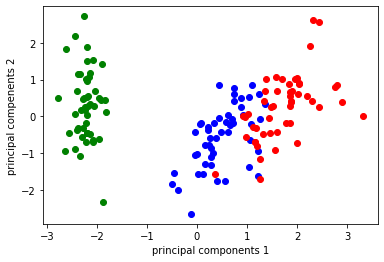

In [11]:
targets=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors=["g", "b", "r"]

plt.xlabel("principal components 1")
plt.ylabel("principal compenents 2")

for target, col in zip(targets, colors):
    dftemp=final_dataframe[df.target==target]
    plt.scatter(dftemp["principal components 1"], dftemp["principal components 2"], color=col)

In [12]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [13]:
#Korunan veri seti yüzdesi
pca.explained_variance_ratio_.sum()

0.9580097536148199